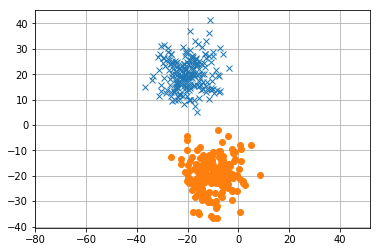

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import time


mean1 = [-20, 20]
cov1 = [[40, 0], [0, 40]]
x1, y1 = np.random.multivariate_normal(mean1, cov1, 200).T

mean2 = [-10, -20]
cov2 = [[40, 0], [0, 40]]
x2, y2 = np.random.multivariate_normal(mean2, cov2, 200).T

plt.plot(x1, y1, 'x')
plt.plot(x2, y2, 'o')
plt.axis('equal')
plt.grid()
plt.show()

In [113]:
#x1
bias = np.ones(200, dtype=np.int) #Add bias term

pos = np.column_stack([x1,y1,bias])
neg = np.column_stack([x2,y2,bias])

all_patterns = np.concatenate([pos,neg])

In [114]:
targets = np.ones(200,dtype=np.int)
minus = -1 * np.ones(200,dtype=np.int)
targets = np.append(targets,minus)

all_samples = np.column_stack([all_patterns,targets])
np.random.shuffle(all_samples)

In [115]:
patterns = all_samples[:200,:3]
targets = all_samples[:200,3]

test_patterns = all_samples[200:,:3]
test_targets = all_samples[200:,3]
#print(test_patterns)
#print(test_targets)

In [116]:
def initWeights(dim):
    w = []
    for i in range(dim):
        w.append(np.random.normal(0,0.01))
    return w
        

In [117]:
#Dimension 2 columns, one for each dimension in input data
#W = 0.01 * np.random.randn(2,2)
W=initWeights(3)
print(W)

[0.007292129130810139, 0.013416215070821094, -0.013424854244909136]


In [118]:
def test(W,X,y):
    predictions = []
    corr = 0
    for i in range(len(y)):        
        pred = np.dot(W,X[i])
        if pred>0:
            predictions.append(1)
        else:
            predictions.append(-1)
    #print(predictions)
    #print(y)
    
    for i in range(len(predictions)):
        if predictions[i]==y[i]:
            corr+=1
            
    acc = corr/len(y)
    return acc

In [119]:
def train_seq(patterns,targets,W,epochs):
    eta = 0.00001

    #Sekventiell
    for i in range(epochs):
        prediction = np.dot(patterns[i],W) #w*X
        error = prediction-targets[i] #beräkna felet

        delta_w = -eta*np.dot(error,np.transpose(patterns[i])) #uppdatera vikterna
        W = np.add(W,delta_w)
        acc = test(W,test_patterns,test_targets)
        print("For iteration",i,"acc is:",acc)
     
    return W

W_seq = train_seq(patterns,targets,W,10)
print(W_seq)

For iteration 0 acc is: 0.94
For iteration 1 acc is: 0.94
For iteration 2 acc is: 0.95
For iteration 3 acc is: 0.95
For iteration 4 acc is: 0.96
For iteration 5 acc is: 0.96
For iteration 6 acc is: 0.96
For iteration 7 acc is: 0.96
For iteration 8 acc is: 0.965
For iteration 9 acc is: 0.965
[ 0.00708065  0.01485443 -0.0134276 ]


In [120]:
print(test(W_seq,test_patterns,test_targets)) 

0.965


In [135]:
def train_batch(patterns,targets,W,epoch):
    eta = 0.0001
    delta_w=0
    print(test(W,test_patterns,test_targets))
    for n in range(epoch):
        error=0
        delta_w=0
        for i in range(len(targets)):
            prediction = np.dot(patterns[i],W) 
            error = prediction-targets[i]
            #print(error)
            delta_w += -eta*np.dot(error,np.transpose(patterns[i]))
        #uppdatera vikterna
        delta_w = delta_w/len(targets)
        ##print(delta_w)
        W = np.add(W,delta_w)
        acc = test(W,test_patterns,test_targets)
        print("For epoch",n,"acc is:",acc)
    return W

W=initWeights(3)
W_batch = train_batch(patterns,targets,W,20)
print(W_batch)
print(test(W_batch,test_patterns,test_targets)) 

0.24
For epoch 0 acc is: 0.36
For epoch 1 acc is: 0.46
For epoch 2 acc is: 0.5
For epoch 3 acc is: 0.585
For epoch 4 acc is: 0.785
For epoch 5 acc is: 0.905
For epoch 6 acc is: 0.98
For epoch 7 acc is: 0.99
For epoch 8 acc is: 0.995
For epoch 9 acc is: 0.995
For epoch 10 acc is: 0.995
For epoch 11 acc is: 0.995
For epoch 12 acc is: 0.995
For epoch 13 acc is: 0.995
For epoch 14 acc is: 0.995
For epoch 15 acc is: 1.0
For epoch 16 acc is: 1.0
For epoch 17 acc is: 1.0
For epoch 18 acc is: 1.0
For epoch 19 acc is: 1.0
[ 0.00045003  0.02576976  0.00227969]
1.0


In [128]:
def trainPerc_seq(patterns, targets, W, epochs):
    eta = 0.00001
    for i in range(epochs):
        counter = 0
        for j in range(len(patterns)):
            prediction = np.dot(patterns[j],W) #w*X
            if not (prediction<0)==(targets[j]<0):
                counter = counter + 1
                error = targets[i]-prediction
                delta_w = eta*np.dot(error,np.transpose(patterns[j]))
                W = np.add(W, delta_w)
        acc = test(W,test_patterns,test_targets)
        print("For epoch",i,"acc is:",acc,"Missprediction in training",counter)
     
    return W

W=initWeights(3)
W_perc_seq = trainPerc_seq(patterns,targets,W,20)
print(W_perc_seq)

For epoch 0 acc is: 0.955 Missprediction in training 31
For epoch 1 acc is: 0.98 Missprediction in training 4
For epoch 2 acc is: 0.98 Missprediction in training 1
For epoch 3 acc is: 0.98 Missprediction in training 1
For epoch 4 acc is: 0.98 Missprediction in training 1
For epoch 5 acc is: 0.98 Missprediction in training 1
For epoch 6 acc is: 0.98 Missprediction in training 1
For epoch 7 acc is: 0.98 Missprediction in training 1
For epoch 8 acc is: 0.98 Missprediction in training 1
For epoch 9 acc is: 0.98 Missprediction in training 1
For epoch 10 acc is: 0.985 Missprediction in training 1
For epoch 11 acc is: 0.98 Missprediction in training 1
For epoch 12 acc is: 0.98 Missprediction in training 1
For epoch 13 acc is: 0.965 Missprediction in training 2
For epoch 14 acc is: 0.95 Missprediction in training 6
For epoch 15 acc is: 0.57 Missprediction in training 37
For epoch 16 acc is: 0.955 Missprediction in training 36
For epoch 17 acc is: 0.98 Missprediction in training 5
For epoch 18 

In [186]:
def trainPerc_batch(patterns, targets, W, epochs):
    eta=0.000001
    for i in range(epochs):
        counter = 0
        delta_w = 0
        for j in range(len(patterns)):
            prediction = np.dot(patterns[j],W) #w*X
            if not (prediction<0)==(targets[j]<0):
                counter += 1
                error = targets[i]-prediction
                delta_w += eta*np.dot(error,np.transpose(patterns[j]))
        
        delta_w = delta_w
        W = np.add(W, delta_w)
        acc = test(W,test_patterns,test_targets)
        print("For epoch",i,"acc is:",acc,"Missprediction in training",counter)
     
    return W

W=initWeights(3)
W_perc_batch = trainPerc_batch(patterns,targets,W,20)
print(W_perc_batch)

For epoch 0 acc is: 0.78 Missprediction in training 84
For epoch 1 acc is: 0.86 Missprediction in training 54
For epoch 2 acc is: 0.835 Missprediction in training 26
For epoch 3 acc is: 0.88 Missprediction in training 33
For epoch 4 acc is: 0.845 Missprediction in training 25
For epoch 5 acc is: 0.91 Missprediction in training 33
For epoch 6 acc is: 0.86 Missprediction in training 21
For epoch 7 acc is: 0.91 Missprediction in training 26
For epoch 8 acc is: 0.88 Missprediction in training 18
For epoch 9 acc is: 0.935 Missprediction in training 25
For epoch 10 acc is: 0.94 Missprediction in training 16
For epoch 11 acc is: 0.935 Missprediction in training 11
For epoch 12 acc is: 0.91 Missprediction in training 13
For epoch 13 acc is: 0.88 Missprediction in training 17
For epoch 14 acc is: 0.845 Missprediction in training 24
For epoch 15 acc is: 0.815 Missprediction in training 32
For epoch 16 acc is: 0.87 Missprediction in training 44
For epoch 17 acc is: 0.915 Missprediction in trainin